Importing the required libraries and functions. I took the LeNet function from the example shown in class and modified it so that it accepts the proper data. Also, please note that the one_hot_patch function is NOT written by me. Due to a buil-in bugs for tensorflow 0.12 for Windows, I have to use an ad-hoc solution provide via github issues.

In [3]:
# Load pickled data
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import pandas as pd
import cv2

def one_hot_patch(x, depth):
    # workaround by name-name from github
    # NOTE: THIS CODE IS NOT BY ME. THERE ARE ISSUES WITH USING CERTAIN FUNCTION IN THE TENSORFLOW WINDOWS BUILD
    # SOURCE: https://github.com/tensorflow/tensorflow/issues/6509
    sparse_labels = tf.reshape(x, [-1, 1])
    derived_size = tf.shape(sparse_labels)[0]
    indices = tf.reshape(tf.range(0, derived_size, 1), [-1, 1])
    concated = tf.concat(1, [indices, sparse_labels])
    outshape = tf.concat(0, [tf.reshape(derived_size, [1]), tf.reshape(depth, [1])])
    return tf.sparse_to_dense(concated, outshape, 1.0, 0.0)


def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    out = []
    for i in range(len(img)):
        out.append(cv2.cvtColor(img[i], cv2.COLOR_BGR2GRAY))
    out = np.array(out)
    out = out[..., np.newaxis]
    return out
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def normalize_grayscale(image_data):
    a = -0.5
    b = 0.5
    grayscale_min = 0
    grayscale_max = 255


    image_data = a + ( ( (image_data - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )
    return image_data


def LeNet(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=mu, stddev=sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # ADDING DROPOUT LAYER TO FIRST FEATURE MAP
    #conv1 = tf.nn.dropout(conv1, keep_prob)

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma))
    conv2_b = tf.Variable(tf.zeros(16))




    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean=mu, stddev=sigma))
    fc1_b = tf.Variable(tf.zeros(120))

    #fc0_drop = tf.nn.dropout(fc0, keep_prob)
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1 = tf.nn.relu(fc1)

    # ADDING DROPOUT LAYER TO FIRST FULLY CONNECTED LAYER
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean=mu, stddev=sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2 = tf.nn.relu(fc2)

    fc2_drop = tf.nn.dropout(fc2, keep_prob_2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b

    return logits

1) Data Set Summary & Exploration



In [5]:
EPOCHS = 30
BATCH_SIZE = 64

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, Y_train = train['features'], train['labels']
X_test, Y_test = test['features'], test['labels']


X_train, Y_train = shuffle(X_train,Y_train)
X_train, X_validation, Y_train, y_validation = train_test_split(X_train,Y_train,test_size=0.2, random_state=10)



### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)
n_validation = len(X_validation)


# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(Y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 31367
Number of testing examples = 12630
Number of validation examples = 7842
Image data shape = (31367, 32, 32, 3)
Number of classes = 43


Plotting the historgram of the data. This is helpful because it shows the frequency of each label. If the model performs poorly on a particular class, this histogram might tell us the reason (due to a bad distrubition of data)

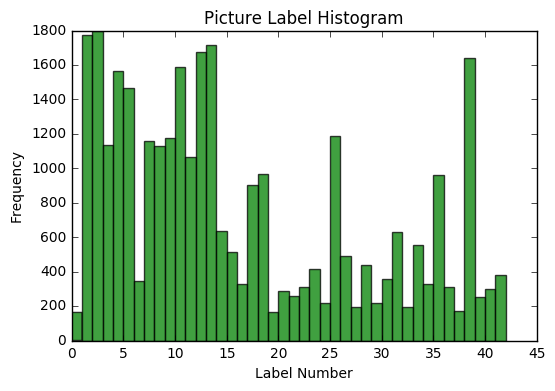

In [3]:
index = random.randint(0,len(X_train))
image = X_train[index].squeeze()
n, bins, patches = plt.hist(Y_train, 42, normed=0, facecolor='green', alpha=0.75)
plt.title("Picture Label Histogram")
plt.xlabel("Label Number")
plt.ylabel("Frequency")

plt.show()


Design and Test a Model Architecture

    For the final submission, I normalized the data so that activation layer can handle the data easily. I also grayscaled the data so that it can learn the data a bit better regardless of the lighting enviroment the picture is taken in.

    By normalizing the data, the performace of the network improved drastically. For this particular application, grayscaling the data improved the performance as well. However, it performed worst when shown new pictures from the internet. I believe the network is capable of detecting features better with the color incorporated. However, the performance can be drastically improved with more data. 

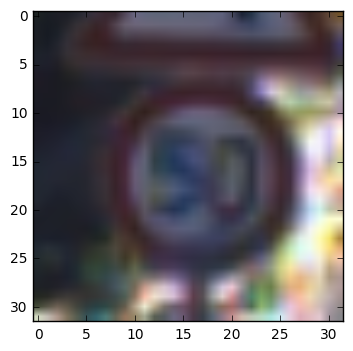

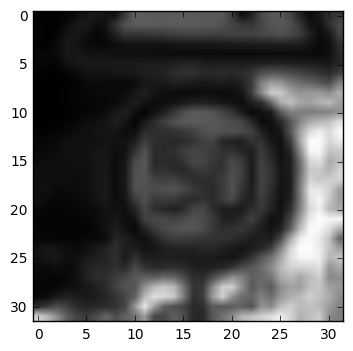

In [4]:
index = random.randint(0,len(X_train))
image = X_train[index].squeeze()
plt.imshow(image)
plt.show()


X_train = grayscale(X_train)

image_g = X_train[index].squeeze()
plt.imshow(image_g,cmap='gray')
plt.show()

X_train = normalize_grayscale(X_train)


X_test = grayscale(X_test)
X_test = normalize_grayscale(X_test)

X_validation = grayscale(X_validation)
X_validation = normalize_grayscale(X_validation)




The code for splitting the data into training and validation sets is contained in the second code cell of the IPython notebook (I copied my code below and commented it out for easier reference)

To cross validate my model, I randomly split the training data into a training set and validation set. I did this by using the train_test_split function in scikit as taught in class.

This is part of the output from cell 2 which shows the number of examples for training, testing, and validation data set:

    Number of training examples = 31367
    Number of testing examples = 12630
    Number of validation examples = 7842



In [ ]:
#X_train, Y_train = shuffle(X_train,Y_train)
#X_train, X_validation, Y_train, y_validation = train_test_split(X_train,Y_train,test_size=0.2, random_state=10)



I took the example provided by class and modified the input tensor x to fit the data. 

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
keep_prob_2 = tf.placeholder(tf.float32)

one_hot_y = one_hot_patch(y, 43)

rate = 0.0015

logits = LeNet(x)


cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()



In [ ]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.8, keep_prob_2: 0.8})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, Y_train = shuffle(X_train, Y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], Y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.9, keep_prob_2: 0.8})

        validation_accuracy = evaluate(X_validation, y_validation)
        training_accuracy = evaluate(X_train, Y_train)
        print("EPOCH {} ...".format(i + 1))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Training  Accuracy = {:.3f}".format(training_accuracy))
    print()

    saver.save(sess, './lenet')
    print("Model saved")

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, Y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

print('Model Complete')

In the first cell where I declare all my functions and libraries, the function called LeNet is an implementation of Lenet-5 for this project. My final submission is a typical LeNet-5 with an addtional two dropout layers at the first two fully connected layers. I have tried to placed the drops outs between the convolution layers but the results were worst. The dropouts probably effect the feature map of the convolution neural network which impedes the self learning process.  The final network architecture is the below:

|      Layer       |                Description                 |
|------------------|--------------------------------------------|
| Input            | 32x32 Gray Scale Image                     |
| Convolution 5x5  | 1x1 stride, same padding, outputs 28x28x6  |
| RELU             |                                            |
| Max pooling      | 2x2 stride, outputs 14x14x6                |
| Convolution 5x5  | 1x1 stride, same padding, outputs 10x10x16 |
| RELU             |                                            |
| Fully Connected  | Input Size=400,Output Size = 120           |
| Dropout          | Keep Probability=0.9                       |
| Fully Connected  | Input Size=120,Output Size = 84            |
| Dropout          | Keep Probability=0.8                       |
| RELU             |                                            |
| Fully Connected  | Input = 84, Output = 43 (labels)           |




For my final model, I have the following hyperparameters:

|  Hyperparameter    |     Value     |
|--------------------|---------------|
| Optimizer          | AdamOptimizer |
| Batch Size         | 64            |
| Epochs             | 30            |
| Learning Rate      | 0.0015        |
| Dropout Value      | 0.9,0.8       |
| Validation Size(%) | 20            |


Also, I tried different types of optimizer which include AdaDelta and GradientDescentOptimizer. However, none of these performed better than the AdamOptimizer. Both of them took a significant more amount of epochs and had a worst testing result

My final model results were:

    training set accuracy of 0.995
    validation set accuracy of 0.981
    test set accuracy of 0.926

    Jupyter crashes everytime I try to run the training cell. I have attached the final model in the zip file with this notebook attached.
    
If an iterative approach was chosen:
What was the first architecture that was tried and why was it chosen?
    
    I tried a typical LeNet-5 but it did not perform as well as I expected on the validation data. I chose this since it is provided by the lectures in class
    
    
What were some problems with the initial architecture?

    It did not perform as well on the validation and testing data
    
How was the architecture adjusted and why was it adjusted? Typical adjustments could include choosing a different model architecture, adding or taking away layers (pooling, dropout, convolution, etc), using an activation function or changing the activation function. One common justification for adjusting an architecture would be due to over fitting or under fitting. A high accuracy on the training set but low accuracy on the validation set indicates over fitting; a low accuracy on both sets indicates under fitting.
    
    I added dropout layers to prevent overfitting since the validation performance was low. I moved the dropout layers and changed the values iteratively until the testing accuracy was about 0.9. 
    
Which parameters were tuned? How were they adjusted and why?
    
        I adjusted the learning rate. I noticed that the maximum validation accuracy started to plateau. I believe that it was stuck in a local optima. I adjusted the learning rate manually until the performace was max.
        
What are some of the important design choices and why were they chosen? For example, why might a convolution layer work well with this problem? How might a dropout layer help with creating a successful model?
    
     The number and complexity of the convolution layer is critical for this project. In order achieve good results, each feature layer had to critically distuingish different aspects of the image. However, to prevent the possibility of overfitting, the best result was to put the dropout near the fully connected layers. I believe a dropout layer at the convolution layer is a bad idea because it impedes the layer from learning critical features.
     
     

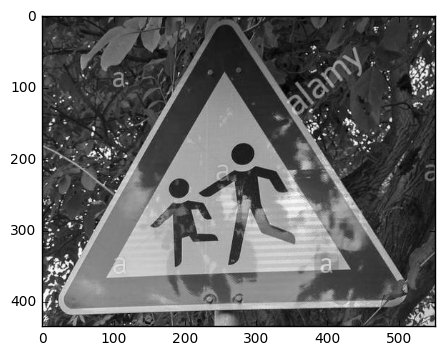

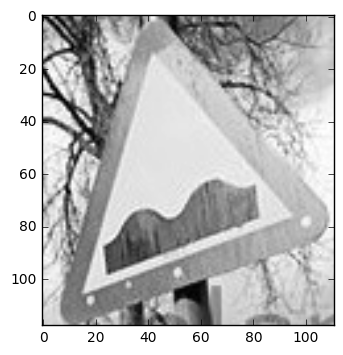

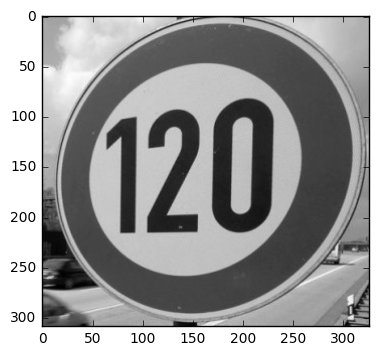

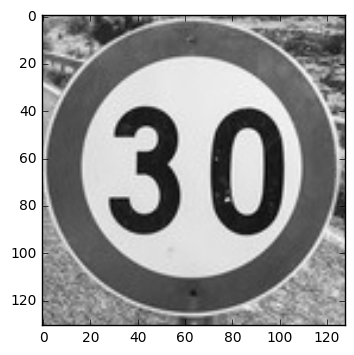

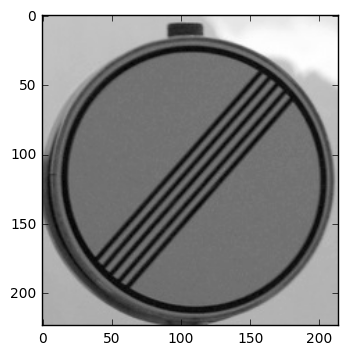

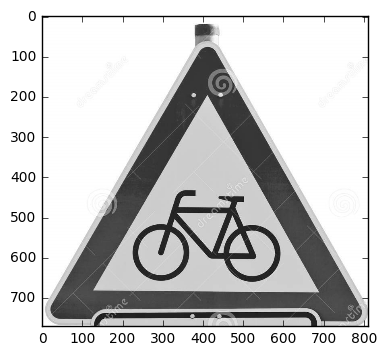

In [4]:
image_array =['Children crossing.jpg','Bumpy road.jpg','120 km per hr.jpg','30 km per hr.jpg','End of all speed and passing limits.jpg','Bicycles crossing.jpg']
classification_array = np.array([])
for image in image_array:
    image_test = cv2.imread(image)
    image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
    plt.imshow(image_test,cmap='gray')
    plt.show()


These are the pictures I took of the internet:


|             Label Type              |                        Difficulty                        |
|-------------------------------------|----------------------------------------------------------|
| Children crossing                   | Shadow and Lighting                                      |
| Bumpy road                          | Bright and picture taken on an angle                     |
| Speed limit (120km/h)               | Dark and picture taken on a angle                        |
| Speed limit (30km/h)                | A weird Instagram like filter was applied to the picture |
| End of all speed and passing limits | Dark with unusual background                             |
| Bicycles crossing                   | Section of sign blocked by another sign                  |



In [10]:
df = pd.read_csv('signnames.csv')
with tf.Session() as sess:
    pred = tf.nn.softmax(logits)
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")

    for image in image_array:
        print('=========================================================')
        image_test = cv2.imread(image)
        image_test = cv2.cvtColor(image_test, cv2.COLOR_BGR2GRAY)
        #plt.imshow(image_test,cmap='gray')
        #plt.show()
        image_test = cv2.resize(image_test, (32, 32))  # classifier takes 32X32 images
        image_test = np.array(image_test)
        resized_image = normalize_grayscale(image_test)
        resized_image = resized_image[..., np.newaxis]

        classification = sess.run(pred, feed_dict={x: [resized_image], keep_prob: 0.9, keep_prob_2: 0.8})
        classification_array = np.append(classification_array,np.argmax(classification))
        classification_5 = np.squeeze(classification)
        top_5 = classification_5.argsort()[-5:][::-1]
        top_5_percentage = np.sort(classification_5)[-5:][::-1]

        top_5_df = df.iloc[top_5]
        top_5_df = top_5_df.assign(Probability= pd.Series(top_5_percentage).values)

        print("Top 5 prediction for image {}".format(image))
        print(top_5_df)
        print()
        print('=========================================================')


Top 5 prediction for image Children crossing.jpg
    ClassId                               SignName   Probability
28       28                      Children crossing  9.998869e-01
41       41                      End of no passing  1.108126e-04
34       34                        Turn left ahead  1.961931e-06
36       36                   Go straight or right  2.826298e-07
11       11  Right-of-way at the next intersection  5.866709e-08

Top 5 prediction for image Bumpy road.jpg
    ClassId              SignName  Probability
33       33      Turn right ahead     0.861406
13       13                 Yield     0.137649
1         1  Speed limit (30km/h)     0.000446
39       39             Keep left     0.000224
14       14                  Stop     0.000145

Top 5 prediction for image 120 km per hr.jpg
    ClassId              SignName   Probability
3         3  Speed limit (60km/h)  1.000000e+00
0         0  Speed limit (20km/h)  1.998197e-08
5         5  Speed limit (80km/h)  3.127311e-1

|                True                 |              Predicted              |
|-------------------------------------|-------------------------------------|
| Children crossing                   | Children crossing                   |
| Bumpy road                          | Turn Right Ahead                    |
| Speed limit (120km/h)               | Speed limit (60km/h)                |
| Speed limit (30km/h)                | Speed limit (60km/h)                |
| End of all speed and passing limits | End of all speed and passing limits |
| Bicycles crossing                   | Bicycles crossing                   |

The model was able to correctly guess 3 of the 6 traffic signs, which gives an accuracy of 50%. This compares worse to the accuracy on the test set of .926. I am not entirely sure why the internet test performs so poorly. I modifed my prediction code numerous times with no success. I believe that if I added additional artificial data such as distorting and adding noise, the internet test set will perform much better.